# Assignment 3 - Demosaicing

- Either of the MSR database or McMaster Dataset can be used for Demosaicing purpose.
- The concepts involved in demosaicing are:
    - The green color channel information is mostly available and can be used for interpolating to get entire green colour channel.
    - Then, bilateral or NLM filter can be applied.
    - To interpolate red and blue colour channels, first gaussian filter is applied to remove high frequency and then HFC (high frequency component) is added from the Green colour channel. **High frequency components are almost same in all the colur channels**

# Import Libraries

In [0]:
import cv2
import numpy as np
from matplotlib import pyplot as plt
from matplotlib import image as mpimg
import math

# Read and plot the image

- The image used is Dataset_LINEAR_without_noise/bayer_panasonic/input/225.png

In [108]:
img_input = cv2.imread('225_input.png', 0)
# img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

print(img_input.shape)
n = img_input.shape[0]
m = img_input.shape[1]

(132, 220)


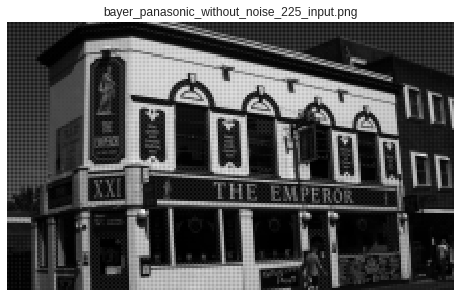

In [109]:
plt.imshow(img_input, cmap='gray'), plt.title('bayer_panasonic_without_noise_225_input.png')
plt.xticks([]), plt.yticks([])
plt.show()

(132, 220, 3)


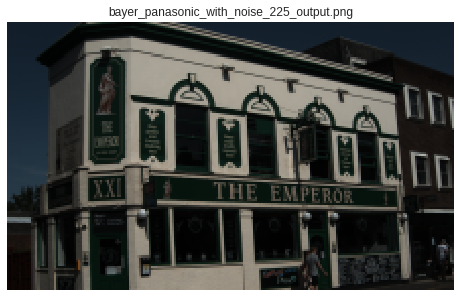

In [110]:
img_original = cv2.imread('225_output.png')
img_original = cv2.cvtColor(img_original, cv2.COLOR_BGR2RGB)

print(img_original.shape)
plt.imshow(img_original), plt.title('bayer_panasonic_with_noise_225_output.png')
plt.xticks([]), plt.yticks([])
plt.show()

# Extract color channels from the Bayer pattern, i.e. the input image

### Green Channel

In [111]:
green_channel = np.asarray(img_input, dtype=np.float32)
green_channel[::2, ::2] = 0
green_channel[1::2, 1::2] = 0
print(green_channel)

[[ 0. 29.  0. ... 30.  0. 30.]
 [30.  0. 30. ...  0. 31.  0.]
 [ 0. 30.  0. ... 31.  0. 31.]
 ...
 [ 5.  0.  6. ...  0. 27.  0.]
 [ 0.  4.  0. ... 24.  0. 22.]
 [ 5.  0.  6. ...  0. 21.  0.]]


### Red Channel

In [112]:
red_channel = np.asarray(img_input, dtype=np.float32)
for i in range(0, n):
    if (i % 2 == 0):
        red_channel[i] = 0
    else:
        for j in range(0, m, 2):
            red_channel[i, j] = 0
print(red_channel)

[[ 0.  0.  0. ...  0.  0.  0.]
 [ 0. 42.  0. ... 42.  0. 43.]
 [ 0.  0.  0. ...  0.  0.  0.]
 ...
 [ 0.  3.  0. ... 25.  0. 24.]
 [ 0.  0.  0. ...  0.  0.  0.]
 [ 0.  3.  0. ... 18.  0. 18.]]


### Blue Channel

In [113]:
blue_channel = np.asarray(img_input, dtype=np.float32)
for i in range(0, n):
    if (i % 2 == 1):
        blue_channel[i] = 0
    else:
        for j in range(1, m, 2):
            blue_channel[i, j] = 0
print(blue_channel)

[[18.  0. 18. ...  0. 18.  0.]
 [ 0.  0.  0. ...  0.  0.  0.]
 [18.  0. 18. ...  0. 19.  0.]
 ...
 [ 0.  0.  0. ...  0.  0.  0.]
 [13.  0. 13. ...  0. 26.  0.]
 [ 0.  0.  0. ...  0.  0.  0.]]


# Interpolate the green channel

In [0]:
for i in range(1, n - 1, 2):
    for j in range(1, m - 1, 2):
        green_channel[i, j] = (green_channel[i - 1, j] + green_channel[i, j - 1] + green_channel[i + 1, j] + green_channel[i, j + 1])/4
        

In [115]:
print(green_channel)

[[ 0.   29.    0.   ... 30.    0.   30.  ]
 [30.   29.75 30.   ... 30.5  31.    0.  ]
 [ 0.   30.    0.   ... 31.    0.   31.  ]
 ...
 [ 5.    4.75  6.   ... 26.   27.    0.  ]
 [ 0.    4.    0.   ... 24.    0.   22.  ]
 [ 5.    0.    6.   ...  0.   21.    0.  ]]


In [0]:
for i in range(2, n - 1, 2):
    for j in range(2, m - 1, 2):
        green_channel[i, j] = (green_channel[i - 1, j] + green_channel[i, j - 1] + green_channel[i + 1, j] + green_channel[i, j + 1])/4     

In [117]:
print(green_channel)

[[ 0.   29.    0.   ... 30.    0.   30.  ]
 [30.   29.75 30.   ... 30.5  31.    0.  ]
 [ 0.   30.   30.   ... 31.   31.   31.  ]
 ...
 [ 5.    4.75  6.   ... 26.   27.    0.  ]
 [ 0.    4.    5.5  ... 24.   23.5  22.  ]
 [ 5.    0.    6.   ...  0.   21.    0.  ]]


In [118]:
count = 0
for i in range(1, n):
    for j in range(1, m):
        if (green_channel[i, j] == 0):
            count = count + 1
print(count)

175


In [119]:
for i in range(0, n):
    for j in range(0, m):
        if (green_channel[i, j] == 0):
            count = 0
            if (i - 1 >= 0):
                count = count + 1
                green_channel[i, j] += green_channel[i - 1, j]
            if (j - 1 >= 0):
                count = count + 1
                green_channel[i, j] += green_channel[i, j - 1]
            if (i + 1 < n):
                count = count + 1
                green_channel[i, j] += green_channel[i + 1, j]
            if (j + 1 < m):
                count = count + 1
                green_channel[i, j] += green_channel[i, j + 1]
            green_channel[i, j] = green_channel[i, j]/count

print(green_channel)

[[29.5       29.        29.666666  ... 30.        30.333334  30.       ]
 [30.        29.75      30.        ... 30.5       31.        30.666666 ]
 [30.        30.        30.        ... 31.        31.        31.       ]
 ...
 [ 5.         4.75       6.        ... 26.        27.        24.333334 ]
 [ 4.6666665  4.         5.5       ... 24.        23.5       22.       ]
 [ 5.         5.         6.        ... 21.        21.        21.5      ]]


# Interpolate the red and blue channels

In [0]:
# on red channel, cannot directly apply interpolation done in the 2nd assignment
red_channel_clipped = red_channel[1:, 1:]

# on green channel, the interpolation done in the 2nd assignment can be directly applied

### Define  functions for interpolation

In [0]:
# Function to convolve image with the given filter
def convolution(img, filter):
    n = img.shape[0]
    m = img.shape[1]
    f = filter.shape[0]
    s = int((f - 1)/2)
    output = np.zeros((n - s, m - s))
    for i in range(s, n - s):
        for j in range(s, m - s):
            output[i, j] = np.sum(np.multiply(img[i-s:i+s+1,j-s:j+s+1], filter))
    return output

In [122]:
# modified gaussian kernal which has weight only where image pixel is not exaclty 0
def gaussian_kernel(n, sigma, img):
    kernel = np.zeros((n, n))
    k = n//2
    for i in range(-k, k+1):
        for j in range(-k,k+1):
            if (img[i+k, j+k] != 0):
                kernel[i+k, j+k] = np.exp(-(i**2 + j**2)/(2.0*sigma**2))/(2*np.pi*sigma**2)
    return kernel/kernel.sum()

img_diag_neighbors = np.array(([1, 0, 2], [0, 3, 0], [4, 0, 5]))
print(gaussian_kernel(3, 1, img_diag_neighbors))

def gaussian_kernel_diag_neighbours(n, sigma):
    img_diagonal = np.array(([1, 0, 1], [0, 1, 0], [1, 0, 1]))
    return gaussian_kernel(n, sigma, img_diagonal)

def gaussian_kernel_str_neighbours(n, sigma):
    img_str = np.array(([0, 1, 0], [1, 1, 1], [0, 1, 0]))
    return gaussian_kernel(n, sigma, img_str)


[[0.14884758 0.         0.14884758]
 [0.         0.40460968 0.        ]
 [0.14884758 0.         0.14884758]]


In [0]:
# modified function to perform convolution of image with a bilateral filter
# only considers those pixels which have 4 diagonal neighbours available

def convolve_bilateral_diagonal(img, sigma):
    
    # first obtain the gaussian_kernel, sigma = 3.0
    g_kernel = gaussian_kernel_diag_neighbours(3, 3.0)
    
    n = img.shape[0]
    m = img.shape[1]
    f = g_kernel.shape[0]
    s = int((f - 1)/2)
    output = np.array(img)
        
    # filter to store pixel intensity square differences
    b_filter = np.zeros((f, f))
    for i in range(s, n - s, 2):
        for j in range(s, m - s, 2):
            # assume center pixel to be mean of neighbouring pixels which are available
            output[i, j] = (img[i - 1, j - 1] + img[i - 1, j + 1] + img[i + 1, j - 1] + img[i + 1, j + 1])/4
            # take pixel intensity differences and multiply with gaussian filter to obtain bilateral filter
            b_filter = np.exp(-((img[i-s:i+s+1, j-s:j+s+1] - output[i, j]))**2/(2*sigma**2))/(2*np.pi*sigma**2)
            filter = np.multiply(g_kernel, b_filter)
            filter = filter/np.sum(filter)
            output[i, j] = np.sum(np.multiply(img[i-s:i+s+1,j-s:j+s+1], filter))
    return output

# only considers those pixels which have 4 straight neighbours available
def convolve_bilateral_str(img, sigma):
    
    g_kernel = gaussian_kernel_str_neighbours(3, 3.0)
    
    n = img.shape[0]
    m = img.shape[1]
    f = g_kernel.shape[0]
    s = int((f - 1)/2)
    output = np.array(img)
    
    b_filter = np.zeros((f, f))
    for i in range(s, n - s, 1):
        if (i % 2 == 0):
            k = s
        else:
            k = s+1
        for j in range(k, m - s, 2):
            output[i, j] = (img[i - 1, j] + img[i, j - 1] + img[i, j + 1] + img[i + 1, j])/4
            b_filter = np.exp(-((img[i-s:i+s+1, j-s:j+s+1] - output[i, j]))**2/(2*sigma**2))/(2*np.pi*sigma**2)
            filter = np.multiply(g_kernel, b_filter)
            filter = filter/np.sum(filter)
            output[i, j] = np.sum(np.multiply(img[i-s:i+s+1, j-s:j+s+1], filter))    
    return output

# only considers those pixels that have 3 straight neighbours available
def convolve_bilateral_three_neighbours(img, sigma):
    
    g_kernel_top = gaussian_kernel(3, 3.0, np.array(([0, 0, 0], [1, 1, 1], [1, 1, 1])))
    g_kernel_left = gaussian_kernel(3, 3.0, np.array(([0, 1, 1], [0, 1, 1], [0, 1, 1])))
    g_kernel_right = gaussian_kernel(3, 3.0, np.array(([1, 1, 0], [1, 1, 0], [1, 1, 0])))
    g_kernel_down = gaussian_kernel(3, 3.0, np.array(([1, 1, 1], [1, 1, 1], [0, 0, 0])))
    
    n = img.shape[0]
    m = img.shape[1]
    f = g_kernel_top.shape[0]
    s = int((f - 1)/2)
    
    output = np.array(img)
    i = 0
    for j in range(s, m - s, 2):
        output[i, j] = np.sum(img[i:i+s+1, j-s:j+s+1])/6
        b_filter = np.exp(-((img[i:i+s+1, j-s:j+s+1] - output[i, j]))**2/(2*sigma**2))/(2*np.pi*sigma**2)
        filter = np.multiply(g_kernel_top[1:,:], b_filter)
        filter = filter/np.sum(filter)
        output[i, j] = np.sum(np.multiply(img[i:i+s+1, j-s:j+s+1], filter))
    
    i = n - 1
    for j in range(s, m - s, 2):
        output[i, j] = np.sum(img[i-s:i+1, j-s:j+s+1])/6
        b_filter = np.exp(-((img[i-s:i+1, j-s:j+s+1] - output[i, j]))**2/(2*sigma**2))/(2*np.pi*sigma**2)
        filter = np.multiply(g_kernel_down[:2,:], b_filter)
        filter = filter/np.sum(filter)
        output[i, j] = np.sum(np.multiply(img[i-s:i+1, j-s:j+s+1], filter))
    
    j = 0
    # error m - s should be n - s
    for i in range(s, n - s, 2):
        output[i, j] = np.sum(img[i-s:i+s+1, j:j+s+1])/6
        b_filter = np.exp(-((img[i-s:i+s+1, j:j+s+1] - output[i, j]))**2/(2*sigma**2))/(2*np.pi*sigma**2)
        filter = np.multiply(g_kernel_left[:,1:], b_filter)
        filter = filter/np.sum(filter)
        output[i, j] = np.sum(np.multiply(img[i-s:i+s+1,j:j+s+1], filter))

    j = m - 1
    for i in range(s, n - s, 2):
        output[i, j] = np.sum(img[i-s:i+s+1, j-s:j+1])/6
        b_filter = np.exp(-((img[i-s:i+s+1, j-s:j+1] - output[i, j]))**2/(2*sigma**2))/(2*np.pi*sigma**2)
        filter = np.multiply(g_kernel_left[:,:2], b_filter)
        filter = filter/np.sum(filter)
        output[i, j] = np.sum(np.multiply(img[i-s:i+s+1,j-s:j+1], filter))
    
    return output

def bilateral_interpolate(img, sigma):
    output = np.zeros((img.shape[0], img.shape[1]))
    output = convolve_bilateral_diagonal(img, sigma)
    output = convolve_bilateral_str(output, sigma)
    output = convolve_bilateral_three_neighbours(output, sigma)
    # copy the 2nd last rows and 2nd last columns into the last rows and columns respectively
#     output[n - 1, :] = output[n - 2, :]
#     output[:, m - 1] = output[:, m - 2]
    
    return output

In [0]:
def interpolate(input_img):
    interpolated_img = bilateral_interpolate(input_img, 10.0) # sigma = 10.0
    return interpolated_img

### Interpolate red channel

In [125]:
red_channel_interpolated = interpolate(red_channel_clipped)
print(red_channel_interpolated, "\n")

print(red_channel_interpolated.shape, "\n")

# get the original shape back by copying 2nd row into 1st and 2nd column into first
red_channel[1:, 1:] = red_channel_interpolated
red_channel[0] = red_channel[1]
red_channel[:, 0] = red_channel[:, 1]
print(red_channel, "\n")

[[42.        40.90116   42.        ... 42.        41.44514   43.       ]
 [40.93487   41.99827   41.997494  ... 42.497944  42.498577  41.392548 ]
 [42.        42.122593  42.        ... 43.        42.560738  42.       ]
 ...
 [ 3.         2.4213643  4.        ... 25.        21.40484   24.       ]
 [ 1.8670062  2.7709386  2.7083013 ... 20.408398  20.608976  16.183641 ]
 [ 3.         2.081061   4.        ... 18.        15.013738  18.       ]] 

(131, 219) 

[[42.        42.        40.90116   ... 42.        41.44514   43.       ]
 [42.        42.        40.90116   ... 42.        41.44514   43.       ]
 [40.93487   40.93487   41.99827   ... 42.497944  42.498577  41.392548 ]
 ...
 [ 3.         3.         2.4213643 ... 25.        21.40484   24.       ]
 [ 1.8670062  1.8670062  2.7709386 ... 20.408398  20.608976  16.183641 ]
 [ 3.         3.         2.081061  ... 18.        15.013738  18.       ]] 



### Interpolate blue channel

In [126]:
blue_channel_interpolated = interpolate(blue_channel)
print(blue_channel_interpolated, "\n")

print(blue_channel_interpolated.shape, "\n")

blue_channel = blue_channel_interpolated
# copy the 2nd last rows and 2nd last columns into the last rows and columns respectively
blue_channel[n - 1, :] = blue_channel[n - 2, :]
blue_channel[:, m - 1] = blue_channel[:, m - 2]
print(blue_channel, "\n")

[[18.        13.314327  18.        ... 15.631262  18.         0.       ]
 [13.333518  17.05694   16.584263  ... 17.610155  13.991618   0.       ]
 [18.        16.6606    18.        ... 17.594015  19.         0.       ]
 ...
 [ 9.498497  11.080879  10.276969  ... 26.528616  23.291565   0.       ]
 [13.         8.393998  13.        ... 24.405031  26.         0.       ]
 [ 0.         5.3848066  0.        ... 12.747199   0.         0.       ]] 

(132, 220) 

[[18.       13.314327 18.       ... 15.631262 18.       18.      ]
 [13.333518 17.05694  16.584263 ... 17.610155 13.991618 13.991618]
 [18.       16.6606   18.       ... 17.594015 19.       19.      ]
 ...
 [ 9.498497 11.080879 10.276969 ... 26.528616 23.291565 23.291565]
 [13.        8.393998 13.       ... 24.405031 26.       26.      ]
 [13.        8.393998 13.       ... 24.405031 26.       26.      ]] 



# Apply Gaussian smoothing filter on red and blue channels

In [127]:
# function to obtain the gaussian kernel
def gaussian_kernel_org(n, sigma):
    kernel = np.zeros((n, n))
    k = n//2
    for i in range(-k, k+1):
        for j in range(-k,k+1):
            kernel[i+k, j+k] = np.exp(-(i**2 + j**2)/(2.0*sigma**2))/(2*np.pi*sigma**2)
    return kernel/kernel.sum()
gaussian_kernel_org(5, 1)

array([[0.00296902, 0.01330621, 0.02193823, 0.01330621, 0.00296902],
       [0.01330621, 0.0596343 , 0.09832033, 0.0596343 , 0.01330621],
       [0.02193823, 0.09832033, 0.16210282, 0.09832033, 0.02193823],
       [0.01330621, 0.0596343 , 0.09832033, 0.0596343 , 0.01330621],
       [0.00296902, 0.01330621, 0.02193823, 0.01330621, 0.00296902]])

In [0]:
kernel = gaussian_kernel_org(3, 10.0)
red_smooth = convolution(red_channel, kernel)
blue_smooth = convolution(blue_channel, kernel)

In [0]:
# copy the 2nd rows and columns into first rows and columns
red_smooth[0] = red_smooth[1]
blue_smooth[0] = blue_smooth[1]

red_smooth[:, 0] = red_smooth[:, 1]
blue_smooth[:, 0] = blue_smooth[:, 1]

# copy the smoothed image into orignal channel variable to make shapes the same
red_channel[:(n-1), :(m-1)] = red_smooth
blue_channel[:(n-1), :(m-1)] = blue_smooth

# Extract high frequency component from green channel

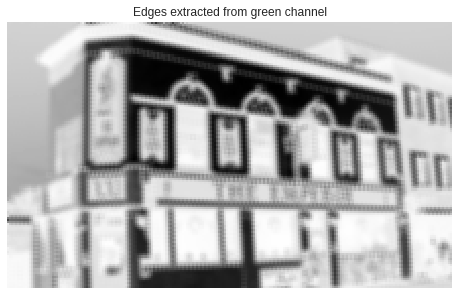

In [164]:
# using high pass filter, sharpen the green channel
high_pass_filter = np.array([[-1/8, -1/8, -1/8], [-1/8, 8/8, -1/8], [-1/8, -1/8, -1/8]])
green_sharp = convolution(green_channel, high_pass_filter)
# green channel with edges (sharpened), make their shapes same
green_channel_2 = np.array(green_channel)
green_channel_2[:(n-1), :(m-1)] = green_sharp

#  get the edges by subtracting the two images
green_edges = green_channel_2 - green_channel

# plot the edges
plt.imshow(green_edges, cmap='gray'), plt.title('Edges extracted from green channel')
plt.xticks([]), plt.yticks([])
plt.show()

# Add HFC in red and blue from Green

In [0]:
red_channel_edge = red_channel + 0.05*green_edges
blue_channel_edge = blue_channel + 0.05*green_edges

# Construct the final image and find PSNR

(132, 220, 3)


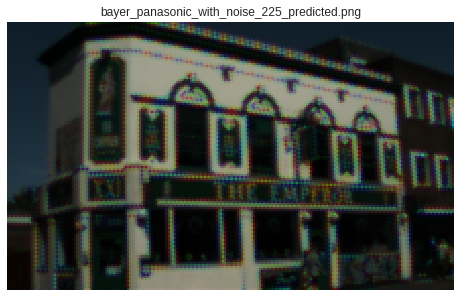

In [180]:
predicted_img = np.zeros((n, m, 3))
predicted_img[:, :, 0] = red_channel_edge
predicted_img[:, :, 1] = green_channel_edge
predicted_img[:, :, 2] = blue_channel_edge
print(predicted_img.shape)

predicted_img = predicted_img.astype(np.uint8)
predicted_img = cv2.cvtColor(predicted_img, cv2.COLOR_BGR2RGB)
plt.imshow(predicted_img), plt.title('bayer_panasonic_with_noise_225_predicted.png')
plt.xticks([]), plt.yticks([])
plt.show()

In [181]:
mse = np.square(np.subtract(predicted_img, img_original)).mean()
psnr = 20.0 * math.log10(255) - 10.0 * math.log10(mse)
print("PSNR for the image is:", round(psnr, 2))

PSNR for the image is: 31.26


In [0]:
# save the predicted image
out_path = "225_predicted.png"
mpimg.imsave(out_path, predicted_img)